In [4]:
#code to perform the classes to perform the Young's Double Slit experiment


import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()
print("Libraries imported successfully!")

Libraries imported successfully!


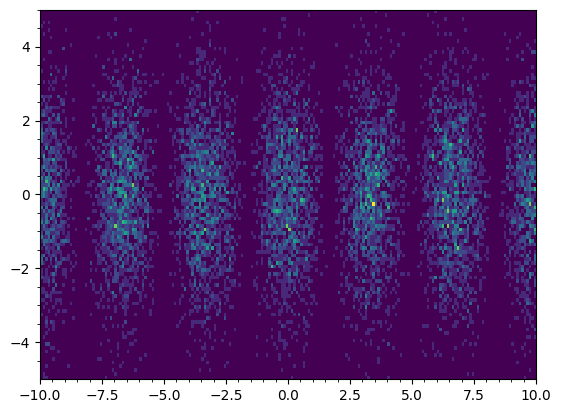

In [3]:
#Creating a doubleSlit object to perform various usecases of the code

my_experiment = doubleSlit()

#Changing slit distances and screen distances
my_experiment.distance_to_screen = 10
my_experiment.slit_dist = 3

#Clearing the screen for the simulation
my_experiment.clear_screen()

#Firing a beam of electrons
my_experiment.electron_beam(num_electrons=10000) #Firing 1000 electrons

#Showing the resultant screen
my_experiment.show_screen()
